Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

In [78]:
import sklearn
from sklearn import tree
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import  display

In [80]:
from IPython.display import  HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [81]:
df = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\heart.csv')

In [82]:
df.head( )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
 X=df[['age','sex','cp', 'trestbps','chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [85]:
y = df.target

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state=42) # 33% выборки из датафрейма пойдет на тестовую. 
# (42 - начальное значение рандомного генератора чисел)

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
np.random.seed(0)

In [90]:
rf = RandomForestClassifier(10, max_depth=5)

In [91]:
rf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

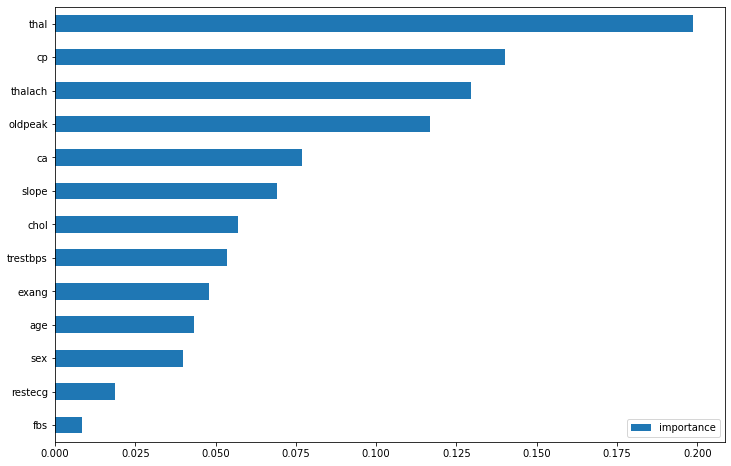

In [92]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Вариант №2 

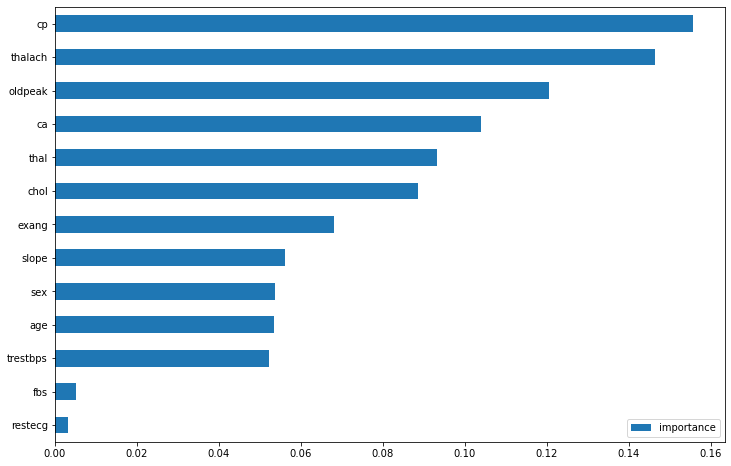

In [95]:
# Импортируем необходимые модули
# для работы с данными.
import pandas as pd
import numpy as np
# для построения леса деревьев решений и обучения моделей.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# для работы с графикой.
import matplotlib.pyplot as plt

# Считываем файл c данными о сердечных заболеваниях.
heart_data = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\heart.csv')

# Отбросим колонку, которую будем предсказывать.
X = heart_data.drop(['target'], axis=1)
# Создадим переменную, которую будем предсказывать.
y = heart_data.target

# Разбиваем DataFrame на подмножества test и train в пропорции 0.33-test, а остальное - train.
rs = np.random.seed(0)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X, y, train_size=0.33, random_state=rs)

# Создаем модель RandomForestClassifier.
rf_heart = RandomForestClassifier()

# Задаем параметры модели.
parametrs = {'n_estimators': [10], 'max_depth': [5]}

# Обучение Random forest моделей GridSearchCV на подмножестве train.
GridSearchCV_heart_clf = GridSearchCV(rf_heart, parametrs, cv=5)
GridSearchCV_heart_clf.fit(X_heart_train, y_heart_train)

# Проведем преобразование, позволяющее определить важность переменных.
best_heart_clf = GridSearchCV_heart_clf.best_estimator_

# Создадим атрибут feature_importances_heart и сохраним его в отдельную переменную.
feature_importances_heart = best_heart_clf.feature_importances_

# Создадим DataFrame с информацией о важности переменных.
feature_importances_heart_df = pd.DataFrame({'feature_importances': feature_importances_heart},
                                            index=X_heart_train.columns)\
    .sort_values(by='feature_importances', ascending=True)\
    .rename(columns={'feature_importances': 'importance'})

# Построение графика важности переменных.
feature_importances_heart_df.plot(kind='barh', figsize=(12, 8))
plt.show()